#**Tugas Besar Pembelajaran Mesin - Tahap 1: Clustering**

Nama  : Fadlan Akmal Ramadhan
<br> NIM   : 1301190351
<br> Kelas : IF-43-12

#Eksplorasi dan Persiapan Data

Header

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files

Read File

In [ ]:
# Read file csv kendaraaan_train sebagai df_kendaraan
url2_train = 'https://drive.google.com/file/d/1MscNjXBK9VAHuaMyYamyuFWfTN1MVOV-/view?usp=sharing'
url_train = 'https://drive.google.com/uc?id=' + url2_train.split('/')[-2]
df_kendaraan = pd.read_csv(url_train)
df_kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


**Preprocessing**

Drop column

In [ ]:
df_kendaraan.drop('id',axis=1,inplace=True)
df_kendaraan.drop('Tertarik',axis=1,inplace=True)

Missing Value

In [ ]:
# Mencari Missing Value pada Dataset Kendaraan
missing_value = df_kendaraan.isnull()
for column in missing_value.columns.values.tolist():
  print(column)
  print(missing_value[column].value_counts())
  print("")
print("False Means There is no NaN or Missing Values in Data Frame. ")
print("True Means There is NaN or Missing Values in Data Frame. ")  

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64

Umur
False    271617
True      14214
Name: Umur, dtype: int64

SIM
False    271427
True      14404
Name: SIM, dtype: int64

Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64

Umur_Kendaraan
False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64

Kendaraan_Rusak
False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64

Premi
False    271262
True      14569
Name: Premi, dtype: int64

Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64

False Means There is no NaN or Missing Values in Data Frame. 
True Means There is NaN or Missing Values in Data Frame. 


Deskripsi data

In [ ]:
print("Jenis Kelamin :\n",df_kendaraan['Jenis_Kelamin'].describe(),"\n")
print("Umur :\n",df_kendaraan['Umur'].describe(),"\n")
print("SIM :\n",df_kendaraan['SIM'].describe(),"\n")
print("Kode Daerah :\n",df_kendaraan['Kode_Daerah'].describe(),"\n")
print("Asuransi :\n",df_kendaraan['Sudah_Asuransi'].describe(),"\n")
print("Umur Kendaraan :\n",df_kendaraan['Umur_Kendaraan'].describe(),"\n")
print("Kendaraan Rusak :\n",df_kendaraan['Kendaraan_Rusak'].describe(),"\n")
print("Premi :\n",df_kendaraan['Premi'].describe(),"\n")
print("Kanal Penjualan :\n",df_kendaraan['Kanal_Penjualan'].describe(),"\n")
print("Lama Berlangganan :\n",df_kendaraan['Lama_Berlangganan'].describe(),"\n")

Jenis Kelamin :
 count     271391
unique         2
top         Pria
freq      146678
Name: Jenis_Kelamin, dtype: object 

Umur :
 count    271617.000000
mean         38.844336
std          15.522487
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Umur, dtype: float64 

SIM :
 count    271427.000000
mean          0.997848
std           0.046335
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: SIM, dtype: float64 

Kode Daerah :
 count    271525.000000
mean         26.405410
std          13.252714
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Kode_Daerah, dtype: float64 

Asuransi :
 count    271602.000000
mean          0.458778
std           0.498299
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: S

In [ ]:
# Mengganti missing value dengan mean/modus
df_kendaraan['Umur'].mode()
df_kendaraan["Umur"].replace(np.nan, 38.844336, inplace=True)

df_kendaraan['Jenis_Kelamin'].mode()
df_kendaraan["Jenis_Kelamin"].replace(np.nan, "Pria", inplace=True)

df_kendaraan['SIM'].mode()
df_kendaraan["SIM"].replace(np.nan, 0.997848, inplace=True)

df_kendaraan['Kode_Daerah'].mode()
df_kendaraan["Kode_Daerah"].replace(np.nan, 26.405410, inplace=True)

df_kendaraan['Sudah_Asuransi'].mode()
df_kendaraan["Sudah_Asuransi"].replace(np.nan, 0.458778, inplace=True)

df_kendaraan['Umur_Kendaraan'].mode()
df_kendaraan["Umur_Kendaraan"].replace(np.nan, "1-2 Tahun", inplace=True)

df_kendaraan['Kendaraan_Rusak'].mode()
df_kendaraan["Kendaraan_Rusak"].replace(np.nan, "Pernah", inplace=True)

df_kendaraan['Premi'].mode()
df_kendaraan["Premi"].replace(np.nan, 30536.683472, inplace=True)

df_kendaraan['Kanal_Penjualan'].mode()
df_kendaraan["Kanal_Penjualan"].replace(np.nan, 112.021567, inplace=True)

df_kendaraan['Lama_Berlangganan'].mode()
df_kendaraan["Lama_Berlangganan"].replace(np.nan, 154.286302, inplace=True)

df_kendaraan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


Cek Kembali dataframe

In [ ]:
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  object 
 6   Kendaraan_Rusak    285831 non-null  object 
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
dtypes: float64(7), object(3)
memory usage: 21.8+ MB


**Mengganti Data Type Objek Menjadi Category**

In [ ]:
object_column = df_kendaraan.select_dtypes(['object']).columns
category_column = df_kendaraan.select_dtypes(['category']).columns
df_kendaraan[object_column]=df_kendaraan[object_column].apply(lambda x: x.astype('category'))

df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Jenis_Kelamin      285831 non-null  category
 1   Umur               285831 non-null  float64 
 2   SIM                285831 non-null  float64 
 3   Kode_Daerah        285831 non-null  float64 
 4   Sudah_Asuransi     285831 non-null  float64 
 5   Umur_Kendaraan     285831 non-null  category
 6   Kendaraan_Rusak    285831 non-null  category
 7   Premi              285831 non-null  float64 
 8   Kanal_Penjualan    285831 non-null  float64 
 9   Lama_Berlangganan  285831 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 16.1 MB


**Mapping Data Type Kategori ke Numeric**

In [ ]:
df_kendaraan[object_column] = df_kendaraan[object_column].apply(lambda x: x.cat.codes)
df_kendaraan[category_column] = df_kendaraan[category_column].apply(lambda x: x.cat.codes)

df_kendaraan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0
2,0,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0
4,0,50.0,1.0,35.0,0.0,2,0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,4.0,1.0,1,1,25988.0,152.0,217.0
285827,1,21.0,1.0,46.0,1.0,1,1,44686.0,152.0,50.0
285828,1,23.0,1.0,50.0,1.0,1,1,49751.0,152.0,226.0
285829,0,68.0,1.0,7.0,1.0,0,1,30503.0,124.0,270.0


In [ ]:
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  int8   
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  int8   
 6   Kendaraan_Rusak    285831 non-null  int8   
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 16.1 MB


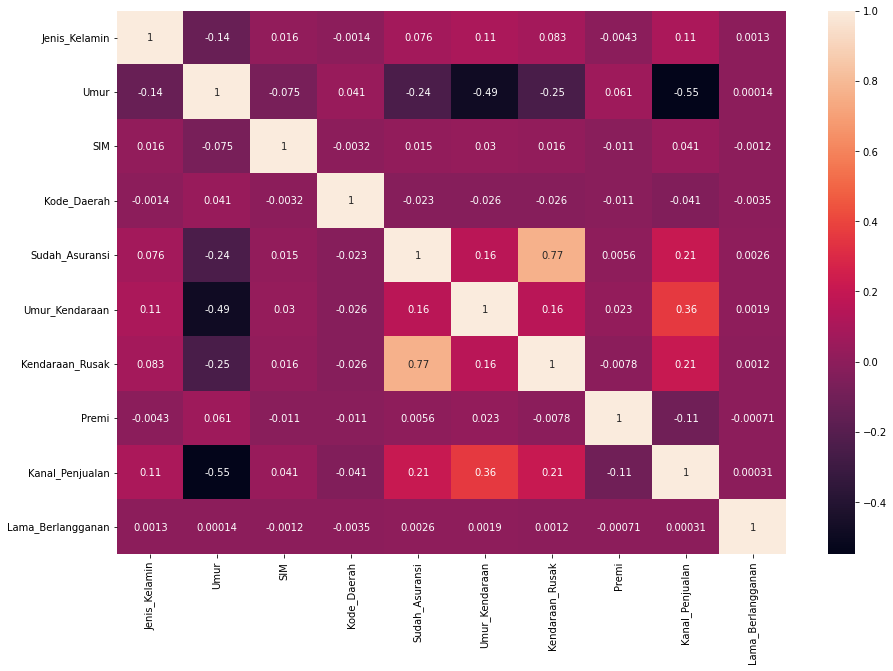

In [ ]:
# Mencari Korelasi Antara Setiap fitur pada Dataset
data_corr = df_kendaraan.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_corr, annot=True, ax=ax)

**Normalisasi Data**

In [ ]:
normalize_data = df_kendaraan.apply(lambda x: (x-np.mean(x)) / (np.max(x)-np.min(x)))
normalize_data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.563683,-0.136067,0.002152,0.126819,0.541222,0.254729,0.529372,-0.004665,0.246780,-0.198222
1,-0.436317,0.140856,0.002152,0.242204,-0.458778,0.754729,-0.470628,-0.008812,-0.512479,0.012850
2,-0.436317,-0.274528,0.002152,0.376819,0.541222,0.254729,0.529372,0.004086,0.296163,-0.122098
3,0.563683,0.294703,0.002152,0.415281,-0.458778,-0.245271,0.529372,-0.051916,0.073941,-0.315870
4,-0.436317,0.171626,0.002152,0.165281,-0.458778,0.754729,-0.470628,0.008037,-0.148281,0.137418
...,...,...,...,...,...,...,...,...,...,...
285826,0.563683,-0.243759,0.002152,-0.430873,0.541222,0.254729,0.529372,-0.008462,0.246780,0.217002
285827,0.563683,-0.274528,0.002152,0.376819,0.541222,0.254729,0.529372,0.026323,0.246780,-0.360852
285828,0.563683,-0.243759,0.002152,0.453742,0.541222,0.254729,0.529372,0.035745,0.246780,0.248144
285829,-0.436317,0.448549,0.002152,-0.373181,0.541222,-0.245271,0.529372,-0.000063,0.073941,0.400393


In [ ]:
# Export data hasil eksplorasi

hasil_eksplorasi = normalize_data[['Umur', 'Kanal_Penjualan']]
hasil_eksplorasi.to_csv("Hasil_Eksplorasi.csv")

#Pemodelan

Data yang Dijadikan Perhitungan adalah umur dan Kanal Penjualan berdasarkan heatmap

In [ ]:
# Umur dan Kanal Penjualan
data = normalize_data.iloc[:, [1,8]].values

# Data yang Digunakan Hanya 50000, untuk Mempersingkat Runtime
data = data[:50000]
print(data)

[[-1.36066707e-01  2.46780453e-01]
 [ 1.40856370e-01 -5.12478806e-01]
 [-2.74528246e-01  2.96163169e-01]
 ...
 [-2.28374399e-01  2.82165450e-09]
 [-1.82220553e-01  2.46780453e-01]
 [ 6.08927254e-10 -1.29762756e-01]]


Text(0.5, 1.0, 'Plot Data Awal')

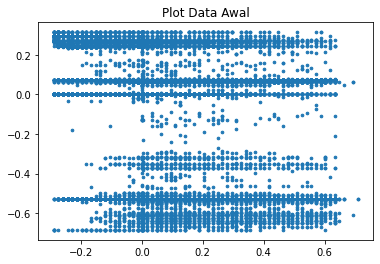

In [ ]:
# Visualisasi Plot Data Awal
plt.scatter(data[:,0], data[:,1],  s = 7)
plt.title('Plot Data Awal')

In [ ]:
# Jumlah Cluster adalah 3
k = 3

# Perulangan dilakukan 100 kali
n = 100

In [ ]:
# Mencari Centroid Acak berjumlah k-Cluster pada suatu data frame
def randCentroid(k,data):
  centroid = np.array([]).reshape(data.shape[1],0)
  for i in range(k):
    rand = rd.randint(0,data.shape[0]-1)
    centroid = np.c_[centroid, data[rand]]
  return centroid

# Melakukan Clustering Pada Suatu Data Frame
def clustering(jarakMin,data):
  i = 0
  for i in range(k):
    cent[i+1] = np.array([]).reshape(2,0)
  for i in range(data.shape[0]):
    cent[minimum[i]] = np.c_[cent[minimum[i]],data[i]]
  for i in range(k):
    cent[i+1] = cent[i+1].T
  for i in range(k):
    centroid[:,i] = np.mean(cent[i+1], axis = 0)
  return cent

# Mencari Jarak Euclidian dari suatu data frame sejumlah k-Cluster
def jarakEuclid(k,data):
  euclidian = np.array([]).reshape(data.shape[0],0)
  for i in range(k):
    dist = np.sum((data-centroid[:,i])**2, axis = 1)
    euclidian = np.c_[euclidian, dist]
  return euclidian


Mencari Random Centroid

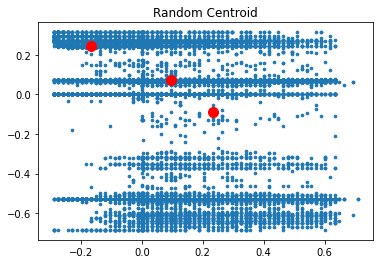

In [ ]:
centroid = randCentroid(k,data)

# Visualisasi Plot Centroid Acak pada Data
plt.scatter(data[:,0],data[:,1], s = 7)
plt.scatter(centroid[0,:], centroid[1,:],marker='o', c='r', label='Centroid', s = 100)
plt.title('Random Centroid')
plt.legend
plt.show()

Clustering

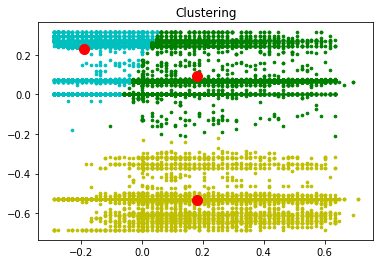

In [ ]:
cluster = {}

for i in range(n):
  minimum = np.argmin(jarakEuclid(k,data), axis = 1) + 1
  cent = {}
 
  # Menghitung Mean Masing-Masing Cluster
  cluster = clustering(minimum,data)

# Visualisasi Plot Hasil Clustering
color = ['c','y','g']
labels = ['Cluster 1','Cluster 2','Cluster 3']
for i in range(k):
  plt.scatter(cluster[i + 1][:,0], cluster[i + 1][:,1], c = color[i], label = labels[i], s = 7)
plt.scatter(centroid[0,:], centroid[1,:], marker = 'o', c = 'r', label = 'Centroid', s = 100)
plt.title('Clustering')
plt.show()

# Note: Runtime About 2m

In [ ]:
for i in range(k):
  print(f"Cluster {i+1}: ", "\n")
  print(cluster[i+1], "\n")

Cluster 1:  

[[-1.36066707e-01  2.46780453e-01]
 [-2.74528246e-01  2.96163169e-01]
 [-2.74528246e-01  2.46780453e-01]
 ...
 [-2.43759015e-01  2.46780453e-01]
 [-2.28374399e-01  2.82165450e-09]
 [-1.82220553e-01  2.46780453e-01]] 

Cluster 2:  

[[ 0.14085637 -0.51247881]
 [ 0.11008714 -0.50013313]
 [ 0.09470252 -0.53099732]
 ...
 [ 0.43316406 -0.53099732]
 [ 0.32547175 -0.53099732]
 [ 0.38701022 -0.50630597]] 

Cluster 3:  

[[ 2.94702524e-01  7.39409473e-02]
 [ 1.71625601e-01 -1.48281275e-01]
 [ 2.33164062e-01  7.39409473e-02]
 ...
 [ 1.71625601e-01  2.82165450e-09]
 [ 3.87010216e-01  7.39409473e-02]
 [ 6.08927254e-10 -1.29762756e-01]] 



#Evaluasi

Mencari Nilai k terbaik Berdasarkan Elbow Method

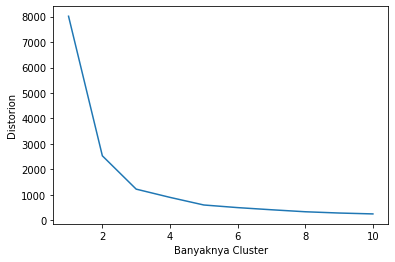

In [ ]:
# Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Visualisasi Plot Banyaknya Cluster dan Distorsi
plt.plot(range(1, 11), wcss)
plt.xlabel('Banyaknya Cluster')
plt.ylabel('Distorion')
plt.show()
# Average Runtime 12s

#Eksperimen

In [ ]:
# Umur dan Kanal Penjualan
dataEksperimen = normalize_data.iloc[:, [1,8]].values
dataEksperimen = dataEksperimen[:50000]

print(dataEksperimen)

[[-1.36066707e-01  2.46780453e-01]
 [ 1.40856370e-01 -5.12478806e-01]
 [-2.74528246e-01  2.96163169e-01]
 ...
 [-2.28374399e-01  2.82165450e-09]
 [-1.82220553e-01  2.46780453e-01]
 [ 6.08927254e-10 -1.29762756e-01]]


Text(0.5, 1.0, 'Plot Data Awal')

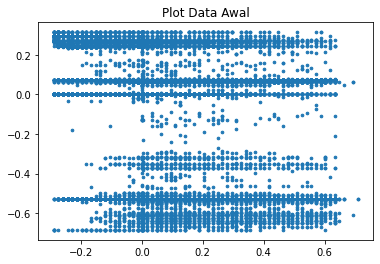

In [ ]:
# Visualisasi Plot Data Awal
plt.scatter(dataEksperimen[:,0], dataEksperimen[:,1],  s = 7)
plt.title('Plot Data Awal')

In [ ]:
# Jumlah Cluster k =  3
k = 3

# Perulangan n dilakukan 100 kali
n = 100

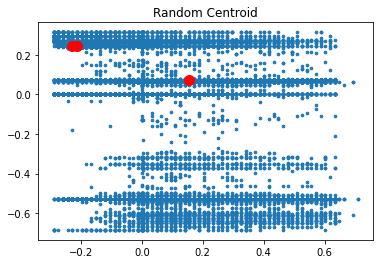

In [ ]:
centroid = randCentroid(k,dataEksperimen)

# Visualisasi Plot Centroid Acak pada Data
plt.scatter(data[:,0], data[:,1], s = 7)
plt.scatter(centroid[0,:], centroid[1,:], marker = 'o', c = 'r', label = 'Centroid', s = 100)
plt.title('Random Centroid')
plt.legend
plt.show()

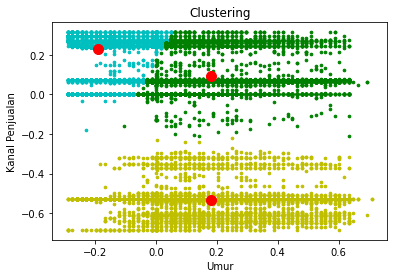

In [ ]:
cluster = {}

for i in range(n):
  min = np.argmin(jarakEuclid(k,dataEksperimen), axis = 1) + 1
  cent = {}
  
  # Menghitung Mean Masing-Masing Cluster
  cluster = clustering(min,dataEksperimen)

# Visualisasi Plot Hasil Clustering
color = ['c','y','g']
labels = ['Cluster 1','Cluster 2','Cluster 3']
for i in range(k):
  plt.scatter(cluster[i+1][:,0], cluster[i+1][:,1], c = color[i], label = labels[i], s = 7)
plt.scatter(centroid[0,:], centroid[1,:], marker = 'o', c = 'r', label = 'Centroid', s = 100)
plt.title('Clustering')
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.show()

# Note: Runtime About 3m

In [ ]:
for i in range(k):
  print(f"Cluster {i+1}: ", "\n")
  print(cluster[i+1], "\n")

Cluster 1:  

[[-1.36066707e-01  2.46780453e-01]
 [-2.74528246e-01  2.96163169e-01]
 [-2.74528246e-01  2.46780453e-01]
 ...
 [-2.43759015e-01  2.46780453e-01]
 [-2.28374399e-01  2.82165450e-09]
 [-1.82220553e-01  2.46780453e-01]] 

Cluster 2:  

[[ 0.14085637 -0.51247881]
 [ 0.11008714 -0.50013313]
 [ 0.09470252 -0.53099732]
 ...
 [ 0.43316406 -0.53099732]
 [ 0.32547175 -0.53099732]
 [ 0.38701022 -0.50630597]] 

Cluster 3:  

[[ 2.94702524e-01  7.39409473e-02]
 [ 1.71625601e-01 -1.48281275e-01]
 [ 2.33164062e-01  7.39409473e-02]
 ...
 [ 1.71625601e-01  2.82165450e-09]
 [ 3.87010216e-01  7.39409473e-02]
 [ 6.08927254e-10 -1.29762756e-01]] 

